In [ ]:
import pandas as pd
import numpy as np
from time import time
#from sklearn.pipeline import FeatureUnion
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from itertools import combinations
from tqdm import tnrange, tqdm_notebook
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.linear_model import Lasso, Ridge
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from math import log
from sklearn.model_selection import cross_val_score
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score

from keras.layers import Input
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import classification_report, accuracy_score

from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
%matplotlib inline
plt.style.use('fivethirtyeight')


In [ ]:
diabetes = pd.read_csv("diabetes.csv",header = 0)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
(diabetes == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

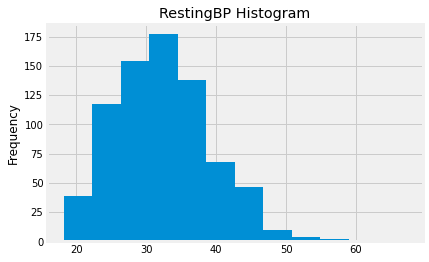

In [ ]:
diabetes = diabetes.loc[diabetes.BMI != 0]

diabetes["BMI"].plot(kind='hist', bins=12, title='RestingBP Histogram')

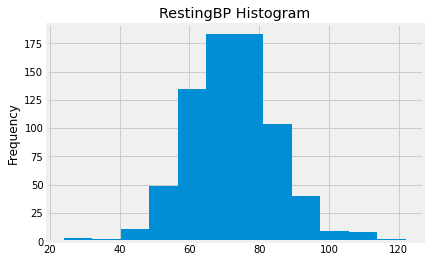

In [ ]:
diabetes = diabetes.loc[diabetes.BloodPressure != 0]

diabetes["BloodPressure"].plot(kind='hist', bins=12, title='RestingBP Histogram')

In [ ]:
num_col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
           'DiabetesPedigreeFunction', 'BMI', 'Age']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


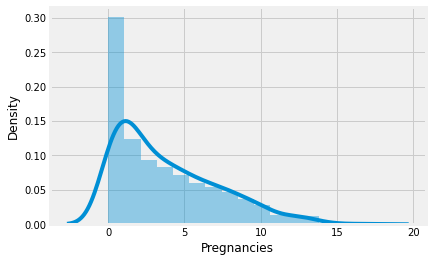

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


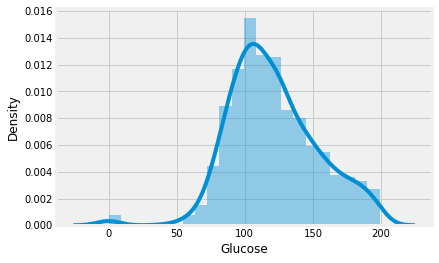

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


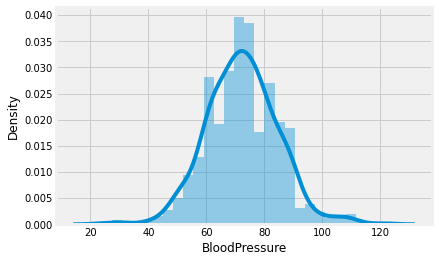

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


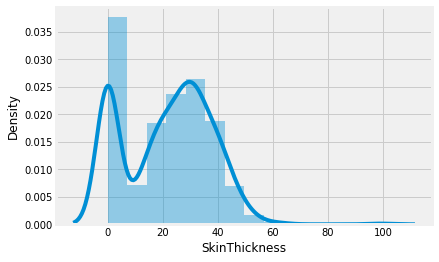

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


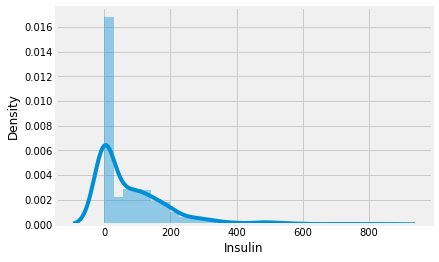

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


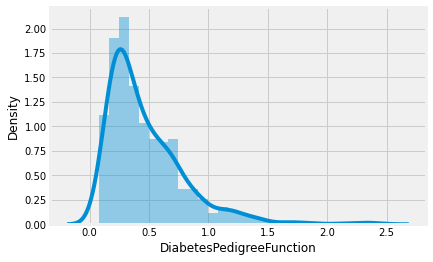

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


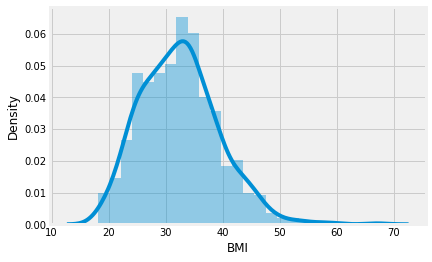

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


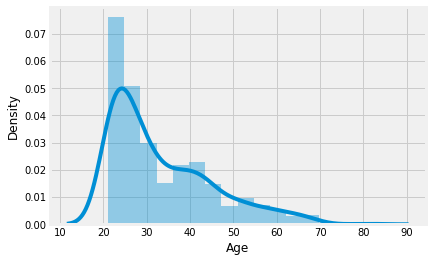

In [ ]:
for col in diabetes[num_col]:
    plt.figure()
    sns.distplot(diabetes[col])
    plt.show()

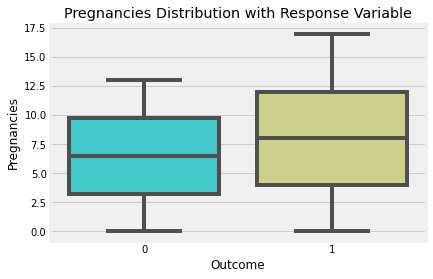

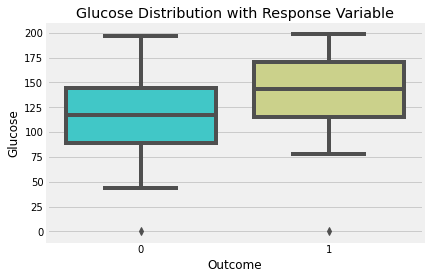

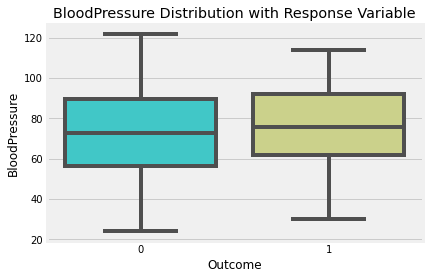

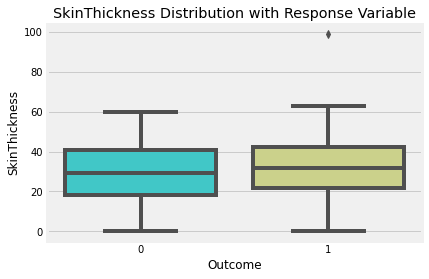

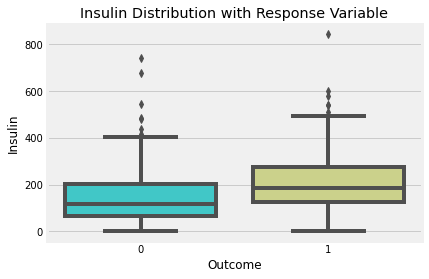

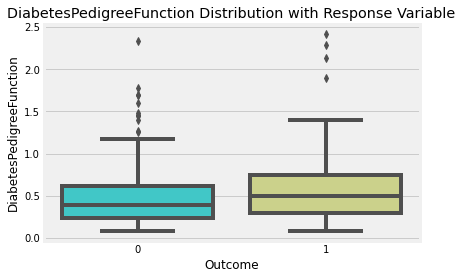

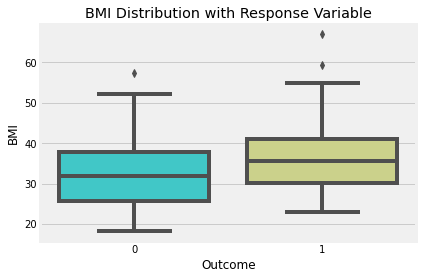

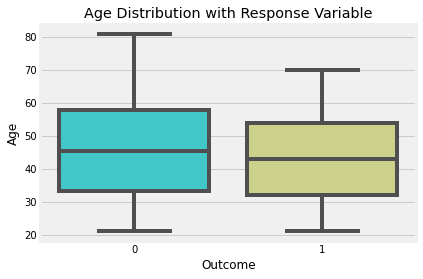

In [ ]:
for col in diabetes[num_col]:
    d = pd.DataFrame(diabetes.groupby([col,"Outcome"]).size())
    d = d.rename(columns = {0:"Count"})
    d.reset_index(inplace= True)

    plt.figure()
    ax = sns.boxplot(x='Outcome',y=col,data=d, palette='rainbow').set(title =f"{col} Distribution with Response Variable")

In [ ]:
diabetes.SkinThickness.replace(0, diabetes.SkinThickness.median(), inplace=True)
diabetes.Insulin.replace(0, diabetes.Insulin.median(), inplace=True)
diabetes.Glucose.replace(0, diabetes.Glucose.median(), inplace=True)
diabetes.BloodPressure.replace(0, diabetes.BloodPressure.median(), inplace=True)
diabetes.BMI.replace(0, diabetes.BMI.median(), inplace=True)

In [ ]:
oversample = SMOTE()
Y=diabetes.Outcome
X=diabetes.loc[:,diabetes.columns != 'Outcome']
X_res, y_res = oversample.fit_resample(X,Y)

In [ ]:
diabetes=pd.concat([X_res,y_res],axis=1)
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,46,33.600000,0.627000,50,1
1,1,85,66,29,46,26.600000,0.351000,31,0
2,8,183,64,24,46,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
951,2,174,77,31,475,35.392980,0.485195,21,1
952,1,129,98,47,145,47.716713,0.728764,29,1
953,1,115,70,29,96,34.484863,0.518342,32,1
954,11,148,85,30,147,35.043029,0.772519,51,1


In [ ]:
Y=diabetes.Outcome
X=diabetes.loc[:,diabetes.columns != 'Outcome']

In [ ]:
from sklearn.preprocessing import Normalizer
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
nl = Normalizer()
nl.fit(X_train)
X_train = nl.transform(X_train)

X_test = nl.transform(X_test)

In [ ]:
def nn():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(128, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(128, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(128, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [ ]:
model = nn()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 8)]               0         
                                                                 
 FC1 (Dense)                 (None, 128)               1152      
                                                                 
 BC1 (BatchNormalization)    (None, 128)               512       
                                                                 
 Activation1 (Activation)    (None, 128)               0         
                                                                 
 Dropout1 (Dropout)          (None, 128)               0         
                                                                 
 FC2 (Dense)                 (None, 128)               16512     
                                                                 
 BC2 (BatchNormalization)    (None, 128)               512   

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=20, min_delta=0.0001)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=200, callbacks=[reduce_lr, early_stopping], verbose=0)

In [ ]:
x_lst = [X_train ,X_test]
y_lst = [y_train,y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = model.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if i == 0:
        print('Training set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
  
    else:
        print('Test set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))

Training set:
	Accuracy:0.831
	Classification Report
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       338
           1       0.78      0.92      0.84       331

    accuracy                           0.83       669
   macro avg       0.84      0.83      0.83       669
weighted avg       0.84      0.83      0.83       669

Test set:
	Accuracy:0.742
	Classification Report
              precision    recall  f1-score   support

           0       0.82      0.60      0.69       140
           1       0.70      0.88      0.78       147

    accuracy                           0.74       287
   macro avg       0.76      0.74      0.74       287
weighted avg       0.76      0.74      0.74       287



In [ ]:
y_pred = model.predict(X_test)
y_pred = np.around(y_pred)
y_pred = np.asarray(y_pred)

In [ ]:
mat=confusion_matrix(y_pred,y_test)

In [ ]:
specifity = mat[1,1]/(mat[1,1] + mat[0,1])
specifity

0.8775510204081632

In [ ]:
sensitivity = mat[0,0]/(mat[0,0] + mat[1,0])
sensitivity

0.6